In [ ]:
from google.colab import drive
from google.colab import files
import pandas as pd

drive.mount('/content/drive')
df_en = pd.read_csv("drive/My Drive/Diploma/second_try/Code/analysis/features_eng.csv")
df_ge = pd.read_csv("drive/My Drive/Diploma/second_try/Code/analysis/features_ge.csv")
df_pl = pd.read_csv("drive/My Drive/Diploma/second_try/Code/analysis/features_pl.csv")
df_pl_upd = pd.read_csv("drive/My Drive/Diploma/second_try/Code/analysis/features_pl_upd.csv")
df_ge_upd = pd.read_csv("drive/My Drive/Diploma/second_try/Code/analysis/features_ge_upd.csv")
df_en.head(2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-12-4722395993c0>:7: DtypeWarning:

Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0.1,Unnamed: 0,page_title,date,around,before,boost,same_day_views,prev_day_views,week_before_views,...,year_before_revs,week_after_revs,day_after_revs,day_after_2_revs,subcategory,-1,Culture,Geography,History_and_Society,STEM
0,0,0,Prime_Minister_of_Haiti,20220101,313,234,1.337607,36,75,345,...,25.0,0.0,0.0,0.0,Regions,0,0,1,0,0
1,1,1,2021%E2%80%932022_Boulder_County_fires,20220101,5643,-1,-5643.000000,591,591,591,...,0.0,0.0,0.0,0.0,Regions,0,0,1,0,0


In [ ]:
df_en.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'page_title', 'date', 'around', 'before',
       'boost', 'same_day_views', 'prev_day_views', 'week_before_views',
       'month_before_views', 'year_before_views', 'day_after_views',
       'week_after_views', 'month_after_views', 'is_event', 'category',
       'category_score', 'same_day_revs', 'prev_day_revs', 'week_before_revs',
       'month_before_revs', 'year_before_revs', 'week_after_revs',
       'day_after_revs', 'day_after_2_revs', 'subcategory', '-1', 'Culture',
       'Geography', 'History_and_Society', 'STEM'],
      dtype='object')

In [ ]:
ev_en = df_en[df_en['is_event']==1]
ev_ge = df_ge[df_ge['is_event']==1]
ev_pl = df_pl[df_pl['is_event']==1]

In [ ]:
ev_en.shape

(9674, 32)

In [ ]:
len(ev_en[ev_en['same_day_revs']==0])/len(ev_en), len(df_ge[df_ge['same_day_revs']==0])/len(df_ge), len(df_pl[df_pl['same_day_revs']==0])/len(df_pl)

(0.7209013851560885, 0.8490292668791655, 0.9058778332693046)

In [ ]:
ev_en['same_day_revs'].min()

-1.0

In [ ]:
ev_en = df_en[df_en['is_event']==1].groupby(['date'])['page_title'].count().reset_index()
ev_en['date'] = pd.to_datetime(ev_en['date'], format='%Y%m%d')
ev_en = ev_en.set_index('date')

ev_ge = df_ge[df_ge['is_event']==1].groupby(['date'])['page_title'].count().reset_index()
ev_ge['date'] = pd.to_datetime(ev_ge['date'], format='%Y%m%d')
ev_ge =ev_ge[ev_ge['date']<'2022-12-01']
ev_ge = ev_ge.set_index('date')

ev_pl = df_pl[df_pl['is_event']==1].groupby(['date'])['page_title'].count().reset_index()
ev_pl['date'] = pd.to_datetime(ev_pl['date'], format='%Y%m%d')
ev_pl =ev_pl[ev_pl['date']<'2022-12-01']
ev_pl = ev_pl.set_index('date')

ev_pl_upd = df_pl_upd[df_pl_upd['is_event']==1].groupby(['date'])['page_title'].count().reset_index()
ev_pl_upd['date'] = pd.to_datetime(ev_pl_upd['date'], format='%Y%m%d')
ev_pl_upd =ev_pl_upd[ev_pl_upd['date']<'2022-12-01']
ev_pl_upd = ev_pl_upd.set_index('date')

ev_en.head()

,page_title
date,
2022-01-01,32
2022-01-02,26
2022-01-03,35
2022-01-04,43
2022-01-05,54


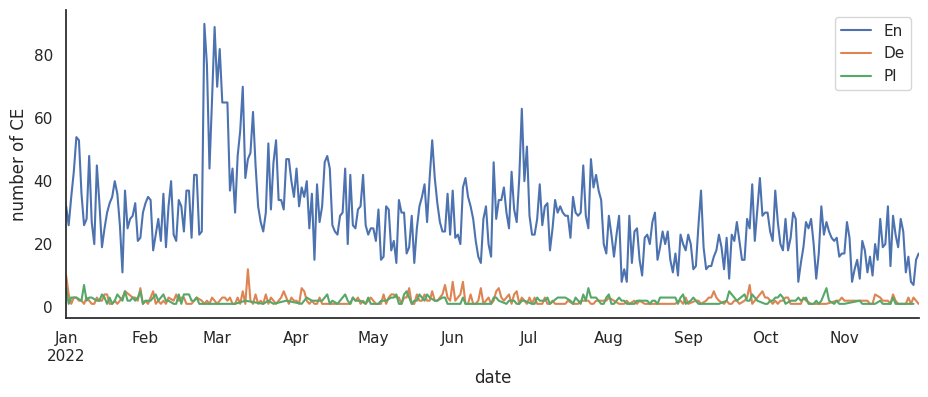

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
sns.set_style("white")
ax = ev_en['page_title'].plot(label='En');
ax = ev_ge['page_title'].plot(label='De');
ax = ev_pl['page_title'].plot(label='Pl');
ax.legend()

# sinplot()
sns.despine()

ax.set_ylabel('number of CE');

In [ ]:
ev_en = ev_en.reset_index()
ev_ge = ev_ge.reset_index()
ev_pl = ev_pl.reset_index()

In [ ]:
ev_en = ev_en.groupby('page_title')['date'].count()
ev_en = pd.DataFrame(ev_en)
ev_en.head()

In [ ]:
ev_ge = ev_ge.groupby('page_title')['date'].count()
ev_ge = pd.DataFrame(ev_ge)

ev_pl = ev_pl.groupby('page_title')['date'].count()
ev_pl = pd.DataFrame(ev_pl)

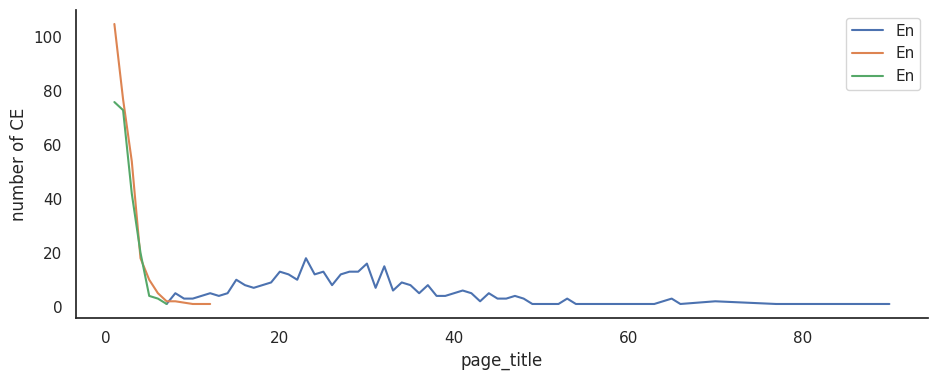

In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})
sns.set_style("white")
ax = ev_en['date'].plot(label='En');
ax = ev_ge['date'].plot(label='En');
ax = ev_pl['date'].plot(label='En');
ax.legend()

# sinplot()
sns.despine()

ax.set_ylabel('number of CE');

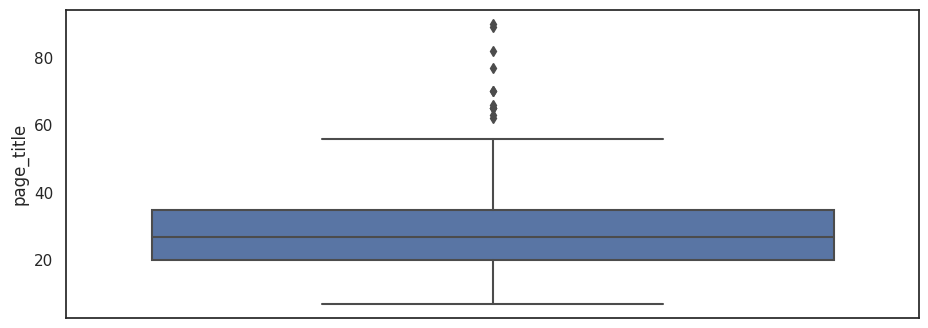

In [ ]:
df = sns.load_dataset('iris')
df.head()

sns.boxplot( y=ev_en['page_title'] );
plt.show()

In [ ]:
ev_en['language'] = 'English'
ev_ge['language'] = 'German'
ev_pl['language'] = 'Polish'

In [ ]:
ev = pd.concat([ev_en,ev_ge,ev_pl], ignore_index=True)
ev.head()

,page_title,language
0,32,English
1,26,English
2,35,English
3,43,English
4,54,English


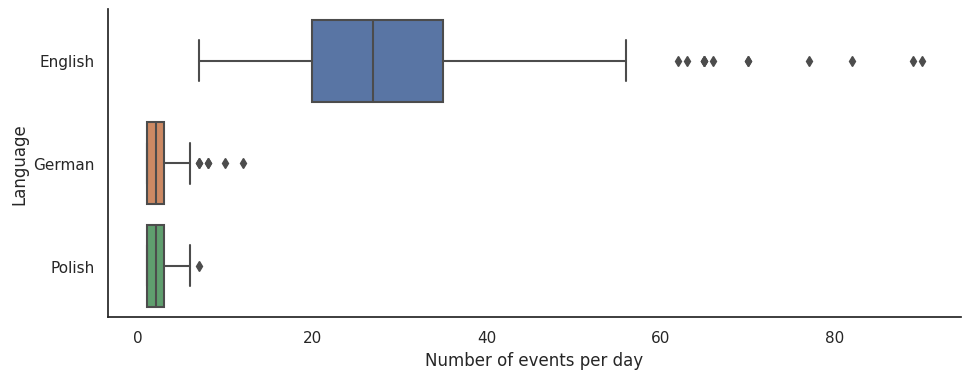

In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})
sns.set_style("white")
ax = sns.boxplot( y=ev["language"], x=ev['page_title']  );
sns.despine()


ax.set_ylabel('Language');
ax.set_xlabel('Number of events per day');

# plt.show()

In [ ]:
ev_en['page_title'].median(), ev_ge['page_title'].median(), ev_pl['page_title'].median()

(27.0, 2.0, 2.0)

In [ ]:
ev_en['page_title'].quantile(0.25), ev_en['page_title'].quantile(0.75)

(20.0, 35.0)

In [ ]:
ev_ge['page_title'].quantile(0.25), ev_ge['page_title'].quantile(0.75)

(1.0, 3.0)

In [ ]:
ev_pl['page_title'].quantile(0.25), ev_pl['page_title'].quantile(0.75)

(1.0, 3.0)

In [ ]:
ev_en['page_title'].max(), ev_ge['page_title'].max(), ev_pl['page_title'].max()

(90, 12, 7)

In [ ]:
import matplotlib, mpl_toolkits

In [ ]:
!pip install pandas-profiling
# 3 dfs with scores

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_en)
prof.to_file(output_file='output.html')

<ipython-input-5-f954585e4d38>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
prof = ProfileReport(df_ge)
prof.to_file(output_file='output.html')

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_pl)
prof.to_file(output_file='output.html')

<ipython-input-4-07780558f53f>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_pl, minimal=True)
profile.to_file(output_file="profile_pl_min.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# category

In [ ]:
set(df_en['category']), set(df_ge['category']), set(df_pl['category'])

({'-1', '-2', 'Culture', 'Geography', 'History_and_Society', 'STEM'},
 {'-1', '-2', 'Culture', 'Geography', 'History_and_Society', 'STEM'},
 {'-1', '-2', 'Culture', 'Geography', 'History_and_Society', 'STEM'})

In [ ]:
# category destribution for all
df_pl_upd['category_upd'] = df_pl_upd['category_upd'].str.split('.', expand=True)[0]
df_ge_upd['category_upd'] = df_ge_upd['category_upd'].str.split('.', expand=True)[0]

import plotly.graph_objects as px
import numpy
 
import plotly.graph_objects as go


layout = go.Layout(yaxis=dict(tickformat=".0%"), font=dict(size=24))
 
cat = [ 'Culture', 'Geography', 'History_and_Society', 'STEM', '-1']
x = [ 'Culture', 'Geography', 'History_and_Society', 'STEM', 'Not defined']
 
plot = px.Figure(data=[px.Bar(
    name = 'English',
    x = x,
    y = [len(df_en[df_en['category']==i])/len(df_en) for i in cat]
   ),
  #                      px.Bar(
  #   name = 'German',
  #   x = x,
  #   y = [len(df_ge[df_ge['category']==i])/len(df_ge) for i in cat]
  #  ),
  #                      px.Bar(
  #   name = 'Polish',
  #   x = x,
  #   y = [len(df_pl[df_pl['category']==i])/len(df_pl) for i in cat]
  #  ),
                       px.Bar(
    name = 'Polish',
    x = x,
    y = [len(df_pl_upd[df_pl_upd['category_upd']==i])/len(df_pl) for i in cat]
   ),
                       px.Bar(
    name = 'German',
    x = x,
    y = [len(df_ge_upd[df_ge_upd['category_upd']==i])/len(df_ge) for i in cat]
   )
], layout=layout)
                  
plot.show()

In [ ]:
# category destribution for all

import plotly.graph_objects as px
import numpy
 
import plotly.graph_objects as go

layout = go.Layout(yaxis=dict(tickformat=".0%"), font=dict(size=24))
 
cat = [ 'Culture', 'Geography', 'History_and_Society', 'STEM', '-1']
x = [ 'Culture', 'Geography', 'History_and_Society', 'STEM', 'Not defined']
 
plot = px.Figure(data=[px.Bar(
    name = 'English',
    x = x,
    y = [len(df_en[df_en['category']==i])/len(df_en) for i in cat]
   ),
                       px.Bar(
    name = 'German',
    x = x,
    y = [len(df_ge[df_ge['category']==i])/len(df_ge) for i in cat]
   ),
                       px.Bar(
    name = 'Polish',
    x = x,
    y = [len(df_pl[df_pl['category']==i])/len(df_pl) for i in cat]
   )
], layout=layout)

# plot.update_xaxes(font=dict(size=50))       
plot.show()

In [ ]:
plot = px.Figure(data=[px.Bar(
    name = 'English',
    x = x,
    y = [len(df_en[df_en['is_event']==1][df_en['category']==i])/len(df_en[df_en['is_event']==1]) for i in cat]
   ),
                       px.Bar(
    name = 'German',
    x = x,
    y = [len(df_ge[df_ge['is_event']==1][df_ge['category']==i])/len(df_ge[df_ge['is_event']==1]) for i in cat]
   ),
                       px.Bar(
    name = 'Polish',
    x = x,
    y = [len(df_pl[df_pl['is_event']==1][df_pl['category']==i])/len(df_pl[df_pl['is_event']==1]) for i in cat]
   )
], layout=layout)
                  
plot.show()

<ipython-input-56-e32a977eee52>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-56-e32a977eee52>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-56-e32a977eee52>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# Views

In [ ]:
# na pages vs events
import numpy as np
print(np.round(len(df_en[(df_en['prev_day_views']<0)&(df_en['is_event']==0)])/len(df_en[df_en['is_event']==0])*100, 2), np.round(len(df_en[(df_en['prev_day_views']<0)&(df_en['is_event']==1)])/len(df_en[df_en['is_event']==1])*100, 2))
print(np.round(len(df_ge[(df_ge['prev_day_views']<0)&(df_ge['is_event']==0)])/len(df_ge[df_ge['is_event']==0])*100, 2), np.round(len(df_ge[(df_ge['prev_day_views']<0)&(df_ge['is_event']==1)])/len(df_ge[df_ge['is_event']==1])*100, 2))
print(np.round(len(df_pl[(df_pl['prev_day_views']<0)&(df_pl['is_event']==0)])/len(df_pl[df_pl['is_event']==0])*100, 2), np.round(len(df_pl[(df_pl['prev_day_views']<0)&(df_pl['is_event']==1)])/len(df_pl[df_pl['is_event']==1])*100, 2))

25.56 3.55
77.61 12.5
70.77 52.34


In [ ]:
# na pages vs events
print(np.round(len(df_en[(df_en['year_before_views']<0)&(df_en['is_event']==0)])/len(df_en[df_en['is_event']==0])*100, 2), np.round(len(df_en[(df_en['year_before_views']<0)&(df_en['is_event']==1)])/len(df_en[df_en['is_event']==1])*100, 2))
print(np.round(len(df_ge[(df_ge['year_before_views']<0)&(df_ge['is_event']==0)])/len(df_ge[df_ge['is_event']==0])*100, 2), np.round(len(df_ge[(df_ge['year_before_views']<0)&(df_ge['is_event']==1)])/len(df_ge[df_ge['is_event']==1])*100, 2))
print(np.round(len(df_pl[(df_pl['year_before_views']<0)&(df_pl['is_event']==0)])/len(df_pl[df_pl['is_event']==0])*100, 2), np.round(len(df_pl[(df_pl['year_before_views']<0)&(df_pl['is_event']==1)])/len(df_pl[df_pl['is_event']==1])*100, 2))

24.4 3.38
75.93 10.9
68.56 47.85


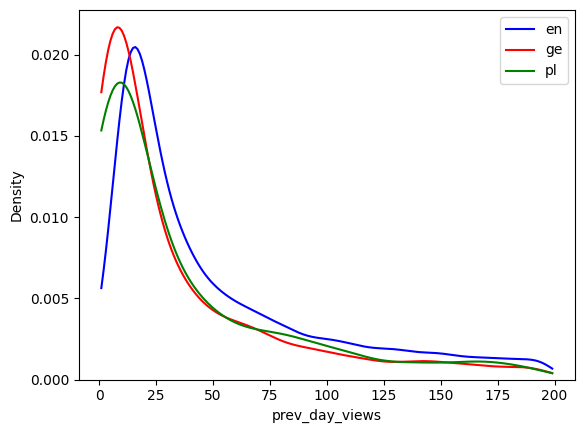

In [ ]:
v1 = df_en[(df_en['prev_day_views']<200)&(df_en['prev_day_views']>=0)]['prev_day_views']
v2 = df_ge[(df_ge['prev_day_views']<200)&(df_ge['prev_day_views']>=0)]['prev_day_views']
v3 = df_pl[(df_pl['prev_day_views']<200)&(df_pl['prev_day_views']>=0)]['prev_day_views']

import seaborn as sns
import matplotlib.pyplot as plt  

sns.kdeplot(v1,  color='b', label='en', cut=0)
sns.kdeplot(v2,   color='r', label='ge', cut=0)
sns.kdeplot(v3,   color='g', label='pl', cut=0)
plt.legend()

<ipython-input-76-dc2a7cd8ffc0>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-76-dc2a7cd8ffc0>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-76-dc2a7cd8ffc0>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-76-dc2a7cd8ffc0>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



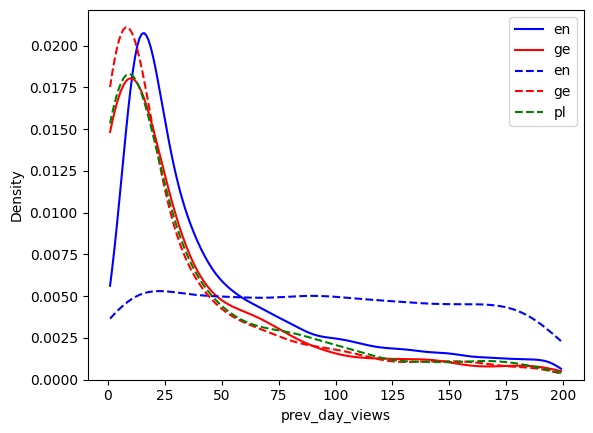

In [ ]:
v1_p = df_en[(df_en['prev_day_views']<200)&(df_en['prev_day_views']>=0)&(df_en['is_event']==0)]['prev_day_views']
v2_p = df_ge[(df_ge['prev_day_views']<200)&(df_ge['prev_day_views']>=0)&(df_en['is_event']==0)]['prev_day_views']
v3_p = df_pl[(df_pl['prev_day_views']<200)&(df_pl['prev_day_views']>=0)&(df_en['is_event']==0)]['prev_day_views']

v1_e = df_en[(df_en['prev_day_views']<200)&(df_en['prev_day_views']>=0)&(df_en['is_event']==1)]['prev_day_views']
v2_e = df_ge[(df_ge['prev_day_views']<200)&(df_ge['prev_day_views']>=0)&(df_en['is_event']==1)]['prev_day_views']
v3_e = df_pl[(df_pl['prev_day_views']<200)&(df_pl['prev_day_views']>=0)&(df_en['is_event']==1)]['prev_day_views']

sns.kdeplot(v1_p,  color='b', label='en', cut=0)
sns.kdeplot(v2_p,   color='r', label='ge', cut=0)
sns.kdeplot(v3_p,   color='g', label='pl', cut=0)

sns.kdeplot(v1_e,  color='b', label='en', cut=0, linestyle="--")
sns.kdeplot(v2_e,   color='r', label='ge', cut=0, linestyle="--")
sns.kdeplot(v3_e,   color='g', label='pl', cut=0, linestyle="--")

plt.legend()

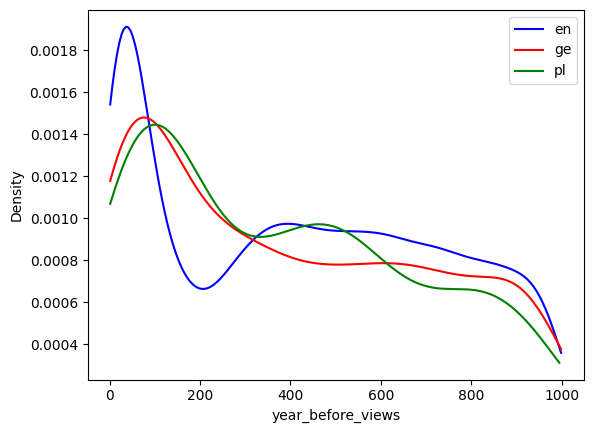

In [ ]:
v1 = df_en[(df_en['year_before_views']<1000)&(df_en['year_before_views']>0)]['year_before_views']
v2 = df_ge[(df_ge['year_before_views']<1000)&(df_ge['year_before_views']>0)]['year_before_views']
v3 = df_pl[(df_pl['year_before_views']<1000)&(df_pl['year_before_views']>0)]['year_before_views']


sns.kdeplot(v1,  color='b', label='en', cut=0)
sns.kdeplot(v2,   color='r', label='ge', cut=0)
sns.kdeplot(v3,   color='g', label='pl', cut=0)
plt.legend()

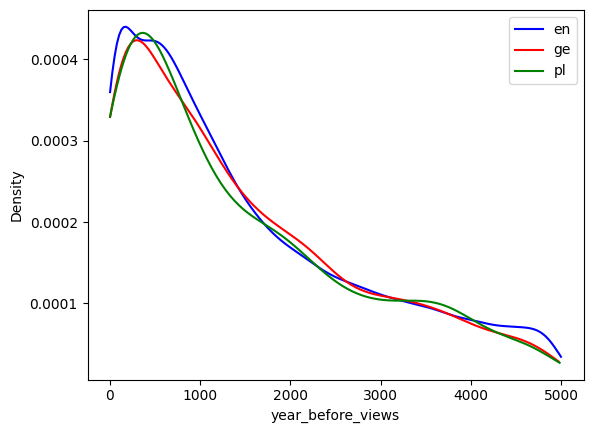

In [ ]:
v1 = df_en[(df_en['year_before_views']<5000)&(df_en['year_before_views']>0)]['year_before_views']
v2 = df_ge[(df_ge['year_before_views']<5000)&(df_ge['year_before_views']>0)]['year_before_views']
v3 = df_pl[(df_pl['year_before_views']<5000)&(df_pl['year_before_views']>0)]['year_before_views']


sns.kdeplot(v1,  color='b', label='en', cut=0)
sns.kdeplot(v2,   color='r', label='ge', cut=0)
sns.kdeplot(v3,   color='g', label='pl', cut=0)
plt.legend()

# Reviews

In [ ]:
# na pages vs events
print(np.round(len(df_en[(df_en['same_day_revs']==0)&(df_en['is_event']==0)])/len(df_en[df_en['is_event']==0])*100, 2), np.round(len(df_en[(df_en['same_day_revs']==0)&(df_en['is_event']==1)])/len(df_en[df_en['is_event']==1])*100, 2))
print(np.round(len(df_ge[(df_ge['same_day_revs']==0)&(df_ge['is_event']==0)])/len(df_ge[df_ge['is_event']==0])*100, 2), np.round(len(df_ge[(df_ge['same_day_revs']==0)&(df_ge['is_event']==1)])/len(df_ge[df_ge['is_event']==1])*100, 2))
print(np.round(len(df_pl[(df_pl['same_day_revs']==0)&(df_pl['is_event']==0)])/len(df_pl[df_pl['is_event']==0])*100, 2), np.round(len(df_pl[(df_pl['same_day_revs']==0)&(df_pl['is_event']==1)])/len(df_pl[df_pl['is_event']==1])*100, 2))

85.85 72.09
84.84 86.34
90.48 91.6


In [ ]:
# na pages vs events
print(np.round(len(df_en[(df_en['year_before_revs']==0)&(df_en['is_event']==0)])/len(df_en[df_en['is_event']==0])*100, 2), np.round(len(df_en[(df_en['year_before_revs']==0)&(df_en['is_event']==1)])/len(df_en[df_en['is_event']==1])*100, 2))
print(np.round(len(df_ge[(df_ge['year_before_revs']==0)&(df_ge['is_event']==0)])/len(df_ge[df_ge['is_event']==0])*100, 2), np.round(len(df_ge[(df_ge['year_before_revs']==0)&(df_ge['is_event']==1)])/len(df_ge[df_ge['is_event']==1])*100, 2))
print(np.round(len(df_pl[(df_pl['year_before_revs']==0)&(df_pl['is_event']==0)])/len(df_pl[df_pl['is_event']==0])*100, 2), np.round(len(df_pl[(df_pl['year_before_revs']==0)&(df_pl['is_event']==1)])/len(df_pl[df_pl['is_event']==1])*100, 2))

16.05 18.44
32.51 33.87
30.57 61.91


In [ ]:
# na pages vs events
print(np.round(len(df_en[(df_en['same_day_revs']<0)&(df_en['is_event']==0)])/len(df_en[df_en['is_event']==0])*100, 2), np.round(len(df_en[(df_en['same_day_revs']<0)&(df_en['is_event']==1)])/len(df_en[df_en['is_event']==1])*100, 2))
print(np.round(len(df_ge[(df_ge['same_day_revs']<0)&(df_ge['is_event']==0)])/len(df_ge[df_ge['is_event']==0])*100, 2), np.round(len(df_ge[(df_ge['same_day_revs']<0)&(df_ge['is_event']==1)])/len(df_ge[df_ge['is_event']==1])*100, 2))
print(np.round(len(df_pl[(df_pl['same_day_revs']<0)&(df_pl['is_event']==0)])/len(df_pl[df_pl['is_event']==0])*100, 2), np.round(len(df_pl[(df_pl['same_day_revs']<0)&(df_pl['is_event']==1)])/len(df_pl[df_pl['is_event']==1])*100, 2))

0.0 0.49
0.0 0.0
0.0 0.0


In [ ]:
# na pages vs events
print(np.round(len(df_en[(df_en['year_before_revs']<0)&(df_en['is_event']==0)])/len(df_en[df_en['is_event']==0])*100, 2), np.round(len(df_en[(df_en['year_before_revs']<0)&(df_en['is_event']==1)])/len(df_en[df_en['is_event']==1])*100, 2))
print(np.round(len(df_ge[(df_ge['year_before_revs']<0)&(df_ge['is_event']==0)])/len(df_ge[df_ge['is_event']==0])*100, 2), np.round(len(df_ge[(df_ge['year_before_revs']<0)&(df_ge['is_event']==1)])/len(df_ge[df_ge['is_event']==1])*100, 2))
print(np.round(len(df_pl[(df_pl['year_before_revs']<0)&(df_pl['is_event']==0)])/len(df_pl[df_pl['is_event']==0])*100, 2), np.round(len(df_pl[(df_pl['year_before_revs']<0)&(df_pl['is_event']==1)])/len(df_pl[df_pl['is_event']==1])*100, 2))

0.0 9.47
0.0 0.15
0.0 1.37


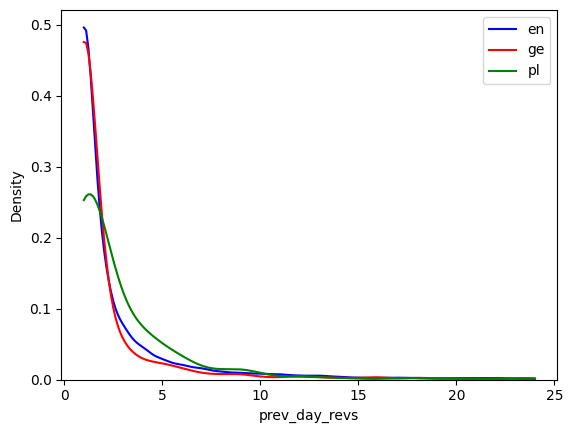

In [ ]:
v1 = df_en[(df_en['prev_day_revs']<25)&(df_en['prev_day_revs']>0)]['prev_day_revs']
v2 = df_ge[(df_ge['prev_day_revs']<25)&(df_ge['prev_day_revs']>0)]['prev_day_revs']
v3 = df_pl[(df_pl['prev_day_revs']<25)&(df_pl['prev_day_revs']>0)]['prev_day_revs']

import seaborn as sns
import matplotlib.pyplot as plt  

sns.kdeplot(v1,  color='b', label='en', cut=0)
sns.kdeplot(v2,   color='r', label='ge', cut=0)
sns.kdeplot(v3,   color='g', label='pl', cut=0)
plt.legend()

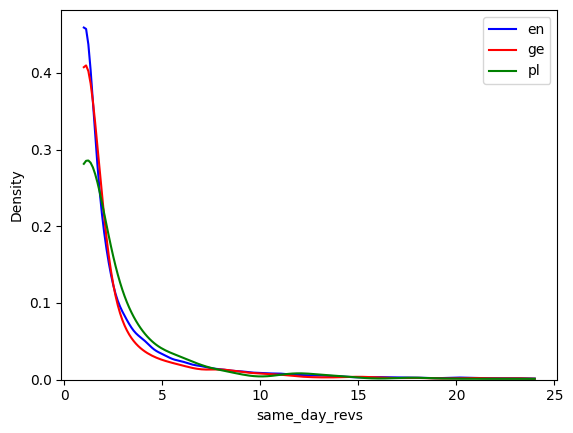

In [ ]:
v1 = df_en[(df_en['same_day_revs']<25)&(df_en['same_day_revs']>0)]['same_day_revs']
v2 = df_ge[(df_ge['same_day_revs']<25)&(df_ge['same_day_revs']>0)]['same_day_revs']
v3 = df_pl[(df_pl['same_day_revs']<25)&(df_pl['same_day_revs']>0)]['same_day_revs']


sns.kdeplot(v1,  color='b', label='en', cut=0)
sns.kdeplot(v2,   color='r', label='ge', cut=0)
sns.kdeplot(v3,   color='rg', label='pl', cut=0)
plt.legend()

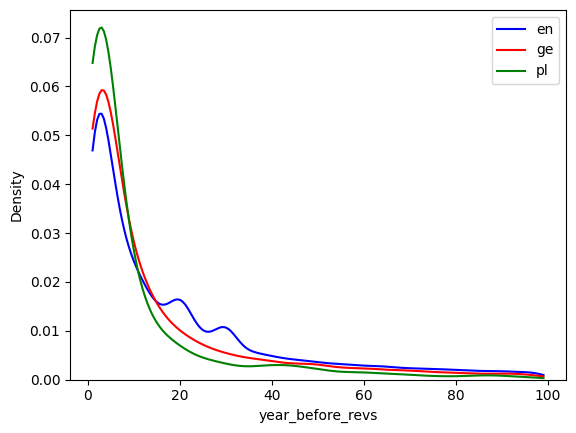

In [ ]:
v1 = df_en[(df_en['year_before_revs']<100)&(df_en['year_before_revs']>0)]['year_before_revs']
v2 = df_ge[(df_ge['year_before_revs']<100)&(df_ge['year_before_revs']>0)]['year_before_revs']
v3 = df_pl[(df_pl['year_before_revs']<100)&(df_pl['year_before_revs']>0)]['year_before_revs']


sns.kdeplot(v1,  color='b', label='en', cut=0)
sns.kdeplot(v2,   color='r', label='ge', cut=0)
sns.kdeplot(v3,   color='g', label='pl', cut=0)
plt.legend()

In [ ]:
en['0']

0         ['Prime_Minister_of_Haiti', '2022-01-01', 0, 0]
1       ['2021%E2%80%932022_Boulder_County_fires', '20...
2       ['Boulder_County,_Colorado', '2022-01-01', -1, 1]
3       ['Vaishno_Devi_Temple_stampede', '2022-01-01',...
4        ['Stampede#Human_stampedes', '2022-01-01', 0, 0]
                              ...                        
9795                    ['Guaratuba', '2022-11-30', 0, 0]
9796    ['Capital_punishment_in_Singapore', '2022-11-3...
9797       ['Singaporean_government', '2022-11-30', 0, 0]
9798    ['Scott_Morrison_ministerial_positions_controv...
9799    ['Australian_House_of_Representatives', '2022-...
Name: 0, Length: 9800, dtype: object

In [ ]:
en = pd.read_csv("drive/My Drive/Diploma/second_try/Code/revisions_features/revisions_features_2_events.csv")
pd.DataFrame(en['0'].values.tolist(), columns=['title', 'date', 'same_day_rev', 'next_day_rev'])

ValueError: ignored

In [ ]:
len(en[en['same_day_revs']<1]), len(en[en['day_after_revs']<1])

(84610, 0)

In [ ]:
ge = pd.read_csv("drive/My Drive/Diploma/second_try/Code/other_language/german_events_revisions_2022_1.csv")
ge

,Unnamed: 0,title,date,same_day_views,prev_day_views,week_before_views,month_before_views,year_before_views,week_after_views,day_after_revs,day_after_2_revs
0,0,Berlin,2022-01-01,2,0,7,19,302,6,-1,0
1,1,Deutschland,2022-01-01,0,0,0,0,2,0,0,0
2,2,Eintagsk%C3%BCken#Tötung_männlicher_Eintagsküken,2022-01-01,0,0,0,0,0,0,0,0
3,3,Flaschenpfand#Pfandsystem_ab_Mai_2005,2022-01-01,0,0,0,0,0,0,0,0
4,4,Getr%C3%A4nkedose,2022-01-01,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1673,1673,Bellinzona,2022-06-08,0,5,7,8,15,0,0,0
1674,1674,Schweiz,2022-06-08,0,0,0,0,0,0,0,0
1675,1675,Bundesstrafgericht,2022-06-08,0,0,0,0,0,0,0,0
1676,1676,Sepp_Blatter#Vorwürfe_betreffend_Korruption_un...,2022-06-08,0,0,0,0,0,0,0,0


In [ ]:
len(ge[ge['same_day_views']<1]), len(ge[ge['day_after_revs']<1])

(1541, 1678)